In [29]:
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
from collections import Counter
import nltk
import warnings
warnings.filterwarnings("ignore")

**Convert train.txt to train.csv**

In [31]:
with open('/content/drive/MyDrive/DLBBT01/data/a_raw_labeled/train.txt', 'r') as input_file, open(
    '/content/drive/MyDrive/DLBBT01/data/a_raw_labeled/train.csv', 'w', newline='') as output_file:
        
        reader = csv.reader(input_file, delimiter=';')
        writer = csv.writer(output_file)
        writer.writerow(['text', 'sentiment'])

        for row in reader:
            writer.writerow(row)

**train data**

In [35]:
train_df = pd.read_csv('/content/drive/MyDrive/DLBBT01/data/a_raw_labeled/train.csv', encoding='utf-8')
train_df.head()

,text,sentiment
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [34]:
#labeling
reviews = np.array(train_df['text'])[:]
labels = np.array(train_df['sentiment'])[:]
Counter(labels)

Counter({'sadness': 4666,
         'anger': 2159,
         'love': 1304,
         'surprise': 572,
         'fear': 1937,
         'joy': 5362})

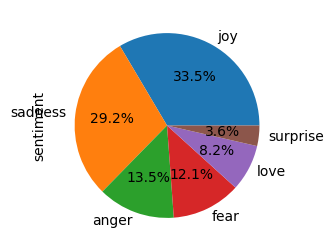

In [36]:
label_count = train_df['sentiment'].value_counts()
plot_users=label_count.plot.pie(autopct='%1.1f%%', figsize=(3, 3))
plt.rc('axes', unicode_minus=False)

**test data**

In [37]:
with open('/content/drive/MyDrive/DLBBT01/data/a_raw_labeled/test.txt', 'r') as input_file, open(
    '/content/drive/MyDrive/DLBBT01/data/a_raw_labeled/test.csv', 'w', newline='') as output_file:
        
        reader = csv.reader(input_file, delimiter=';')
        writer = csv.writer(output_file)
        writer.writerow(['text', 'sentiment'])

        for row in reader:
            writer.writerow(row)

In [38]:
test_df = pd.read_csv('/content/drive/MyDrive/DLBBT01/data/a_raw_labeled/test.csv', encoding='utf-8')
test_df.head()

,text,sentiment
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness


In [39]:
#labeling
reviews = np.array(test_df['text'])[:]
labels = np.array(test_df['sentiment'])[:]
Counter(labels)

Counter({'sadness': 581,
         'joy': 695,
         'fear': 224,
         'anger': 275,
         'love': 159,
         'surprise': 66})

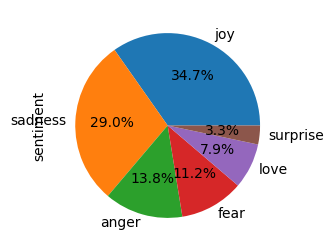

In [40]:
label_count = test_df['sentiment'].value_counts()
plot_users=label_count.plot.pie(autopct='%1.1f%%', figsize=(3, 3))
plt.rc('axes', unicode_minus=False)

**Both train and test dataset are imbalance datasets**

# **Oversampling with imblearn on train dataset**

Using RandomOverSampler from the imblearn library to balance an imbalanced datase:

1.Calculate the count of each class label in the original dataset using Counter()

2.Select a target count that represents the count of 'joy' class label to balance with. 

3.Create an instance of RandomOverSampler & specify the target count for each class label using a dictionary that maps each label to the target count.

4.Fit the oversampler on the original dataset using fit_resample() and pass the text values and label values as two separate arguments.

5.Convert the resampled data to a pandas DataFrame.

In [41]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [42]:
from imblearn.over_sampling import RandomOverSampler

mylabels = train_df['sentiment']
label_counts = Counter(mylabels)

# set target count to 'joy' class
target_count = label_counts['joy']

# create the oversampler, apply 
ros = RandomOverSampler(sampling_strategy={label: target_count for label in label_counts})
x_resampled, y_resampled = ros.fit_resample(train_df['text'].values.reshape(-1, 1), mylabels)

# convert the resampled data to df
train_df_resampled = pd.DataFrame({'text': x_resampled.flatten(), 'sentiment': y_resampled})

print(Counter(train_df_resampled['sentiment']))

Counter({'sadness': 5362, 'anger': 5362, 'love': 5362, 'surprise': 5362, 'fear': 5362, 'joy': 5362})


In [43]:
train_df_resampled.to_csv('/content/drive/MyDrive/DLBBT01/data/b_processed_labeled/train.csv', index=False)

In [44]:
train_df= pd.read_csv('/content/drive/MyDrive/DLBBT01/data/b_processed_labeled/train.csv', encoding='utf-8')
train_df.shape

(32172, 2)

In [45]:
#labeling
reviews = np.array(train_df['text'])[:]
labels = np.array(train_df['sentiment'])[:]
print(Counter(labels))

Counter({'sadness': 5362, 'anger': 5362, 'love': 5362, 'surprise': 5362, 'fear': 5362, 'joy': 5362})


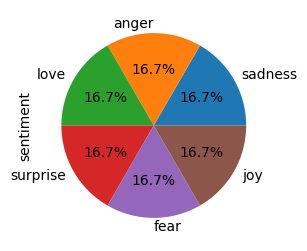

In [46]:
#plot_train data
import matplotlib.pyplot as plt
label_count = train_df['sentiment'].value_counts()
plot_users=label_count.plot.pie(autopct='%1.1f%%', figsize=(3, 3))
plt.rc('axes', unicode_minus=False)

# **Oversampling with imblearn on Test Data**

In [47]:
# get the labels and their counts
herlabels = test_df['sentiment']
herlabel_counts = Counter(herlabels)

# set the target count to the count of the 'joy' class
target_count = herlabel_counts['joy']

# create the oversampler and apply it to the data
ros = RandomOverSampler(sampling_strategy={label: target_count for label in herlabel_counts})
x_resampled, y_resampled = ros.fit_resample(test_df['text'].values.reshape(-1, 1), herlabels)

# convert the resampled data to a dataframe
test_df_resampled = pd.DataFrame({'text': x_resampled.flatten(), 'sentiment': y_resampled})

print(Counter(test_df_resampled['sentiment']))

Counter({'sadness': 695, 'joy': 695, 'fear': 695, 'anger': 695, 'love': 695, 'surprise': 695})


In [48]:
test_df_resampled.to_csv('/content/drive/MyDrive/DLBBT01/data/b_processed_labeled/test.csv', index=False)

In [49]:
test_df= pd.read_csv('/content/drive/MyDrive/DLBBT01/data/b_processed_labeled/test.csv', encoding='utf-8')
test_df.shape

(4170, 2)

In [50]:
#labeling
reviews = np.array(test_df['text'])[:]
labels = np.array(test_df['sentiment'])[:]
print(Counter(labels))

Counter({'sadness': 695, 'joy': 695, 'fear': 695, 'anger': 695, 'love': 695, 'surprise': 695})


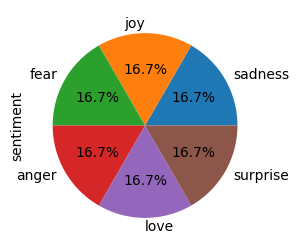

In [51]:
#plot test data
import matplotlib.pyplot as plt
label_count = test_df['sentiment'].value_counts()
plot_users=label_count.plot.pie(autopct='%1.1f%%', figsize=(3, 3))
plt.rc('axes', unicode_minus=False)

# **Now both train and test datasets are perfectly balanced**

In [11]:
def clean_text(text):
    import re
    from string import punctuation
    text=re.sub(r'(http|ftp|https):\/\/([\w\-_]+(?:(?:\.[\w\-_]+)+))([\w\-\.,@?^=%&:/~\+#]*[\w\-\@?^=%&/~\+#])?', 
                ' ', text)
    text=re.sub(r'['+punctuation+']',' ',text)
    text=re.sub(r'#(\w+)',' ',text)
    text=re.sub(r'@(\w+)',' ',text)
    text = text.lower() # Convert  to lowercase

    token=RegexpTokenizer(r'\w+')
    tokens = token.tokenize(text)

    lemmatizer = WordNetLemmatizer()
    stems = [lemmatizer.lemmatize(t) for t in tokens]
    stemmer = PorterStemmer()
    stems = [stemmer.stem(t) for t in stems]
    
    return ' '.join(stems)

def tokenize(text):
    token=RegexpTokenizer(r'\w+')
    tokens = token.tokenize(text)    
    return tokens    

# **Vectorizer tf-idf**

In [ ]:
# cv = TfidfVectorizer(lowercase=True, preprocessor=clean_text, stop_words='english',
#                      ngram_range=(1,3), tokenizer=tokenize)
# text_counts = cv.fit_transform(train_df['text'].values.astype('U'))

# x_train, x_test, y_train, y_test = train_test_split(text_counts, train_df['sentiment'],
#                                                     stratify=train_df['sentiment'], test_size=0.3, shuffle=True)

In [12]:
# Define the vectorizer and fit it to the training data
cv = TfidfVectorizer(lowercase=True, preprocessor=clean_text, stop_words='english',
                             ngram_range=(1,3), tokenizer=tokenize)

x_train = cv.fit_transform(train_df['text'].values.astype('U'))
y_train = train_df['sentiment']

# Vectorize the test data using the same vectorizer
x_test = cv.transform(test_df['text'].values.astype('U'))
y_test = test_df['sentiment']

In [13]:
def performance_evaluation():

#def Classification_report():
    class_report = classification_report(y_test, y_pred)
    print(class_report)
    
#def conf_matrix_img():    
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(conf_matrix)
    print("")
    #Normalized Confusion Matrix
    nconf_matrix = np.round(conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis],1)
    print(nconf_matrix)    

#def heatmap_image():    
    le = LabelEncoder()
    le.fit(labels)
    class_labels = le.classes_
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 18))
    sns.heatmap(conf_matrix, annot=True, cmap=plt.cm.Blues, fmt="d", xticklabels=class_labels, yticklabels=class_labels, ax=ax1)
    ax1.set_xlabel("Predicted labels")
    ax1.set_ylabel("True labels")
    ax1.set_title("Confusion Matrix")
    sns.heatmap(nconf_matrix, annot=True, cmap=plt.cm.Greens, fmt=".2f", xticklabels=class_labels, yticklabels=class_labels, ax=ax2)
    ax2.set_xlabel("Predicted labels")
    ax2.set_ylabel("True labels")
    ax2.set_title("Normalized")
    # Add some space between the subplots
    plt.subplots_adjust(wspace=1)

    # Set the aspect ratio to "equal"
    ax1.set_aspect("equal")
    ax2.set_aspect("equal")

    # Save the chart to a file
    #plt.savefig('../spam_filter/docs/images/combined_heatmaps.jpeg',transparent=False,
    #bbox_inches='tight', pad_inches=0.1)
    plt.show()

# **Compare several Machine Learning Models**

**Mutinomial Naive Bayes Classifier**

In [14]:
#Multinomial Naive Bayes 
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(alpha=0.2)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
metrics.accuracy_score(y_test, y_pred)

0.7628297362110312

**Bernoulli NB**

In [16]:
#Ber_NB
from sklearn.naive_bayes import *
from sklearn import metrics
clf=BernoulliNB()
clf.fit(x_train,y_train)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
metrics.accuracy_score(y_test, y_pred)

0.7697841726618705

**Logistic Regression**

In [17]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C=0.3)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
metrics.accuracy_score(y_test, y_pred)

0.8556354916067146

**SVM (Support Vector Machine)**

In [21]:
#SVM (Support Vector Machine)
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
clf = SVC(kernel='linear')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
metrics.accuracy_score(y_test, y_pred)
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

0.8326139088729017

**SVM + L2 Regulation + Cross Validation**

In [22]:
from sklearn import svm
from sklearn.model_selection import cross_val_score
clf = svm.LinearSVC(penalty='l2', C=0.3, dual=False)
scores = cross_val_score(clf, x_train, y_train, cv=4)
print("Cross Validation Scores: ", scores)
print("Average Cross Validation Score: ", np.mean(scores))

clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("Accuracy with L2 regularization and cross-validation: ", metrics.accuracy_score(y_test, y_pred))

Cross Validation Scores:  [0.95934353 0.9564839  0.96655477 0.97438767]
Average Cross Validation Score:  0.9641924654979485
Accuracy with L2 regularization and cross-validation:  0.8628297362110312


**SVM + L1 Regulation + Cross Validation**

In [23]:
from sklearn import svm
from sklearn.model_selection import cross_val_score
clf = svm.LinearSVC(penalty='l2', C=0.3, dual=False)
scores = cross_val_score(clf, x_train, y_train, cv=4)
print("Cross Validation Scores: ", scores)
print("Average Cross Validation Score: ", np.mean(scores))

clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("Accuracy with L1 regularization and cross-validation: ", metrics.accuracy_score(y_test, y_pred))

Cross Validation Scores:  [0.95934353 0.9564839  0.96655477 0.97438767]
Average Cross Validation Score:  0.9641924654979485
Accuracy with L1 regularization and cross-validation:  0.8628297362110312


**Linear SVC**

In [18]:
#Linear SVC
from sklearn import svm
clf = svm.LinearSVC()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
metrics.accuracy_score(y_test, y_pred)

0.8345323741007195

**Linear SVC + L2 Regulation + Cross Validation**

In [19]:
clf = svm.LinearSVC(penalty='l2', C=0.3, dual=False)
scores = cross_val_score(clf, x_train, y_train, cv=4)
print("Cross Validation Scores: ", scores)
print("Average Cross Validation Score: ", np.mean(scores))

clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print("Accuracy with L2 regularization and cross validation: ", metrics.accuracy_score(y_test, y_pred))

Cross Validation Scores:  [0.95934353 0.9564839  0.96655477 0.97438767]
Average Cross Validation Score:  0.9641924654979485
Accuracy with L2 regularization and cross validation:  0.8628297362110312


**Linear SVC + L1 Regulation + Cross Validation**

In [24]:
from sklearn.model_selection import cross_val_score
clf = svm.LinearSVC(penalty='l1', loss='squared_hinge', C=0.3, dual=False)
scores = cross_val_score(clf, x_train, y_train, cv=4)
print("Cross Validation Scores: ", scores)
print("Average Cross Validation Score: ", np.mean(scores))

clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print("Accuracy with L1 regularization and cross validation: ", metrics.accuracy_score(y_test, y_pred))

Cross Validation Scores:  [0.91421112 0.9129678  0.91856273 0.9129678 ]
Average Cross Validation Score:  0.9146773591943305
Accuracy with L1 regularization and cross validation:  0.8839328537170263


              precision    recall  f1-score   support

       anger       0.89      0.91      0.90       695
        fear       0.88      0.83      0.85       695
         joy       0.88      0.85      0.86       695
        love       0.87      0.87      0.87       695
     sadness       0.94      0.90      0.92       695
    surprise       0.85      0.94      0.90       695

    accuracy                           0.88      4170
   macro avg       0.88      0.88      0.88      4170
weighted avg       0.88      0.88      0.88      4170

[[633  20  10  10  15   7]
 [ 29 579   2   0  12  73]
 [ 10   5 589  67   5  19]
 [ 16  12  44 606   8   9]
 [ 24  18  14  10 624   5]
 [  0  27  13   0   0 655]]

[[0.9 0.  0.  0.  0.  0. ]
 [0.  0.8 0.  0.  0.  0.1]
 [0.  0.  0.8 0.1 0.  0. ]
 [0.  0.  0.1 0.9 0.  0. ]
 [0.  0.  0.  0.  0.9 0. ]
 [0.  0.  0.  0.  0.  0.9]]


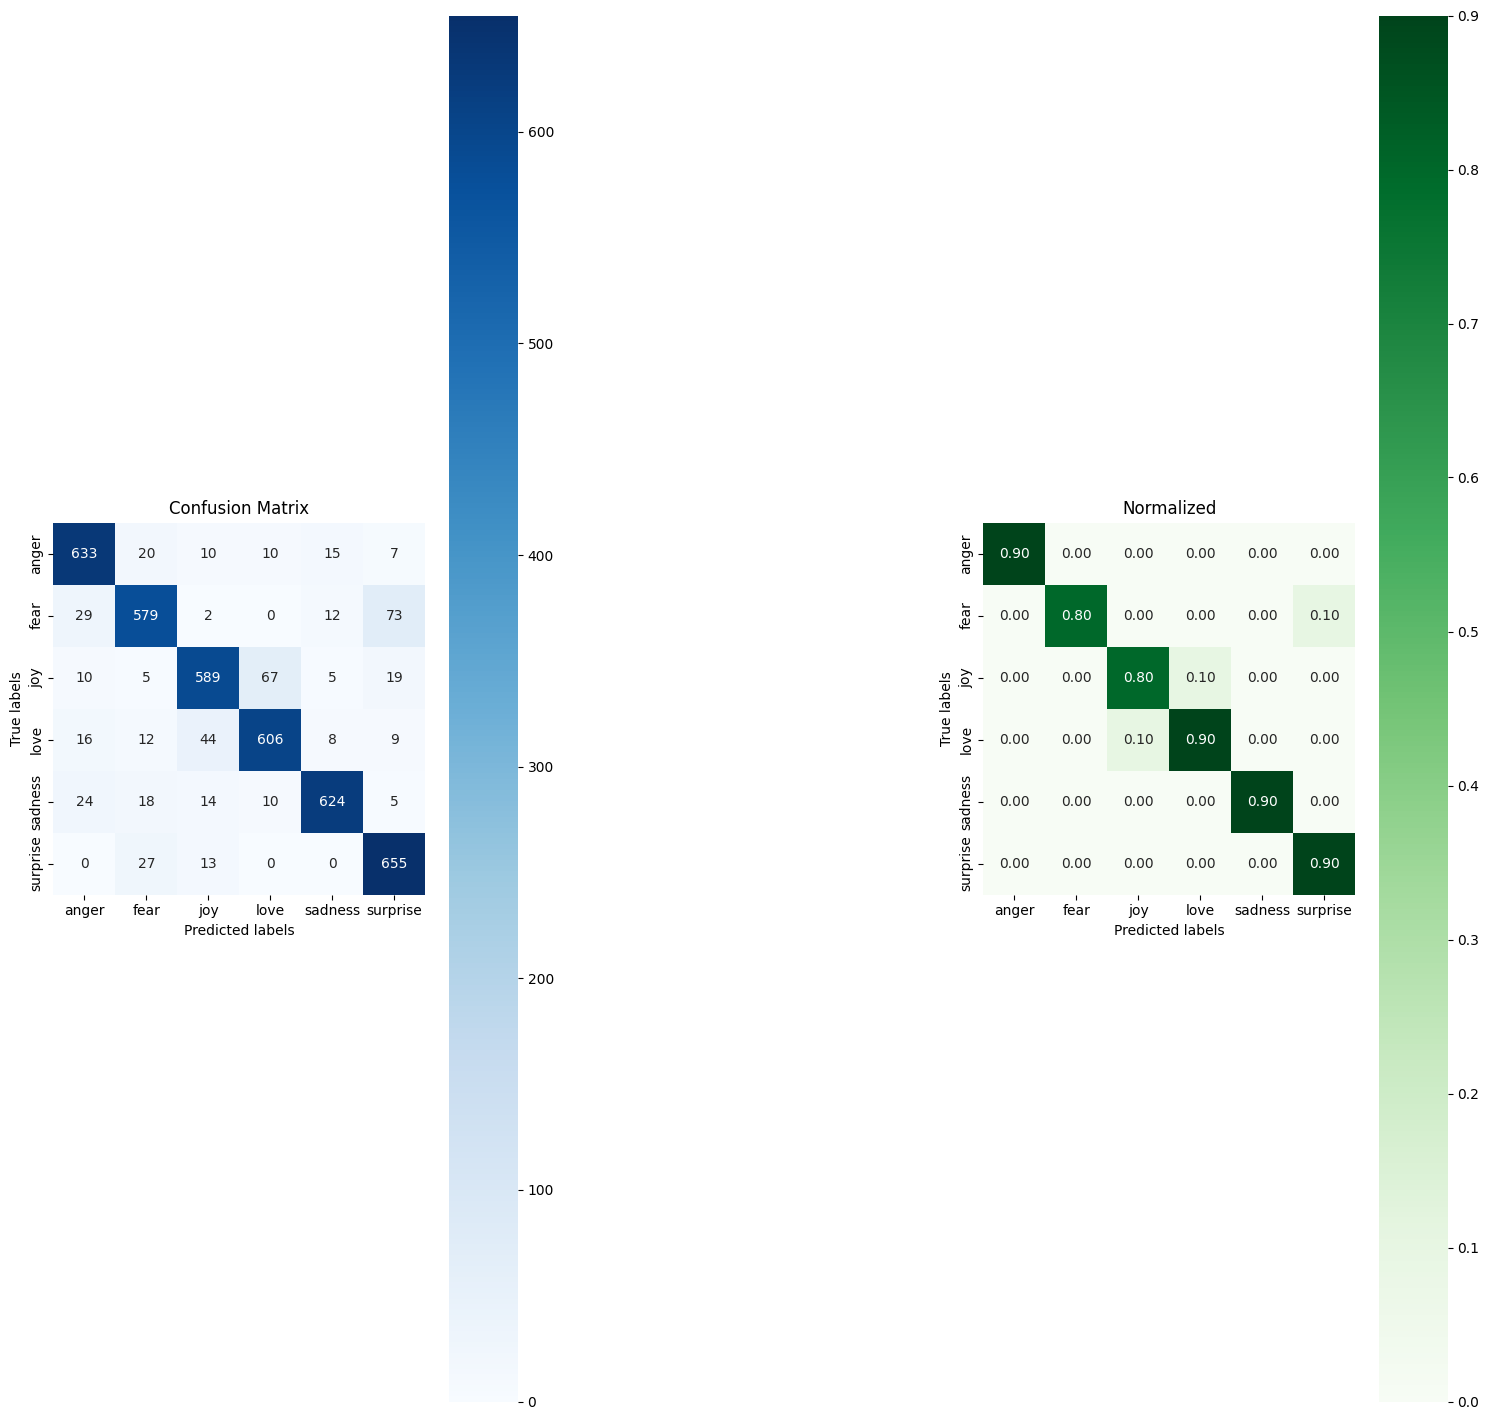

In [25]:
performance_evaluation()

# **Save the model and vectorizer**

In [26]:
def train_models():
    file = open('/content/drive/MyDrive/DLBBT01/model_deloy/vectorizer.pickle','wb')
    pickle.dump(cv, file)
    file.close()

    file = open('/content/drive/MyDrive/DLBBT01/model_deloy/model.pickle','wb')
    pickle.dump(clf, file)
    file.close()
    
    print("Models saved")

In [27]:
train_models()

Models saved


# **Load model dan vectorizer**

In [28]:
def load_models():  
       
    # Load the vectorizer.
    file = open('/content/drive/MyDrive/DLBBT01/model_deloy/vectorizer.pickle', 'rb')
    vectorizer = pickle.load(file)
    file.close()
    
    # Load the LR Model.
    file = open('/content/drive/MyDrive/DLBBT01/model_deloy/vectorizer.pickle', 'rb')
    model = pickle.load(file)
    file.close()
    
    return vectorizer, model